# Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv',low_memory=False)
test=pd.read_csv('test.csv',low_memory=False)
store=pd.read_csv('store.csv',low_memory=False)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
missing_percentage = (train.isnull().sum() / len(train)) * 100
print(missing_percentage)
#train data miss nadarad

Store            0.0
DayOfWeek        0.0
Date             0.0
Sales            0.0
Customers        0.0
Open             0.0
Promo            0.0
StateHoliday     0.0
SchoolHoliday    0.0
dtype: float64


In [4]:
missing_percentage = (store.isnull().sum() / len(store)) * 100
print(missing_percentage)
#train data miss nadarad

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64


In [5]:
threshold=len(store)*0.6
store=store.dropna(thresh=threshold,axis=1)
store.head()
#sotoon ha ba bish az 40% Na ra hazf mikonim

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,1270.0,9.0,2008.0,0
1,2,a,a,570.0,11.0,2007.0,1
2,3,a,a,14130.0,12.0,2006.0,1
3,4,c,c,620.0,9.0,2009.0,0
4,5,a,a,29910.0,4.0,2015.0,0


In [6]:
store['CompetitionDistance']=store['CompetitionDistance'].fillna(store['CompetitionDistance'].median())

In [7]:
store['CompetitionOpenSinceMonth'] = store['CompetitionOpenSinceMonth'].fillna(1)
store['CompetitionOpenSinceYear'] = store['CompetitionOpenSinceYear'].fillna(1900)
#store.csv clean shod

In [8]:
missing_percentage = (test.isnull().sum() / len(test)) * 100
print(missing_percentage)

Id               0.000000
Store            0.000000
DayOfWeek        0.000000
Date             0.000000
Open             0.026772
Promo            0.000000
StateHoliday     0.000000
SchoolHoliday    0.000000
dtype: float64


In [9]:
test['Open'] = test['Open'].fillna(1)
#test.csv clean shod

In [26]:
#train va store ra dar ham join mikonim
train_store= pd.merge(train,store, on='Store',how='left')

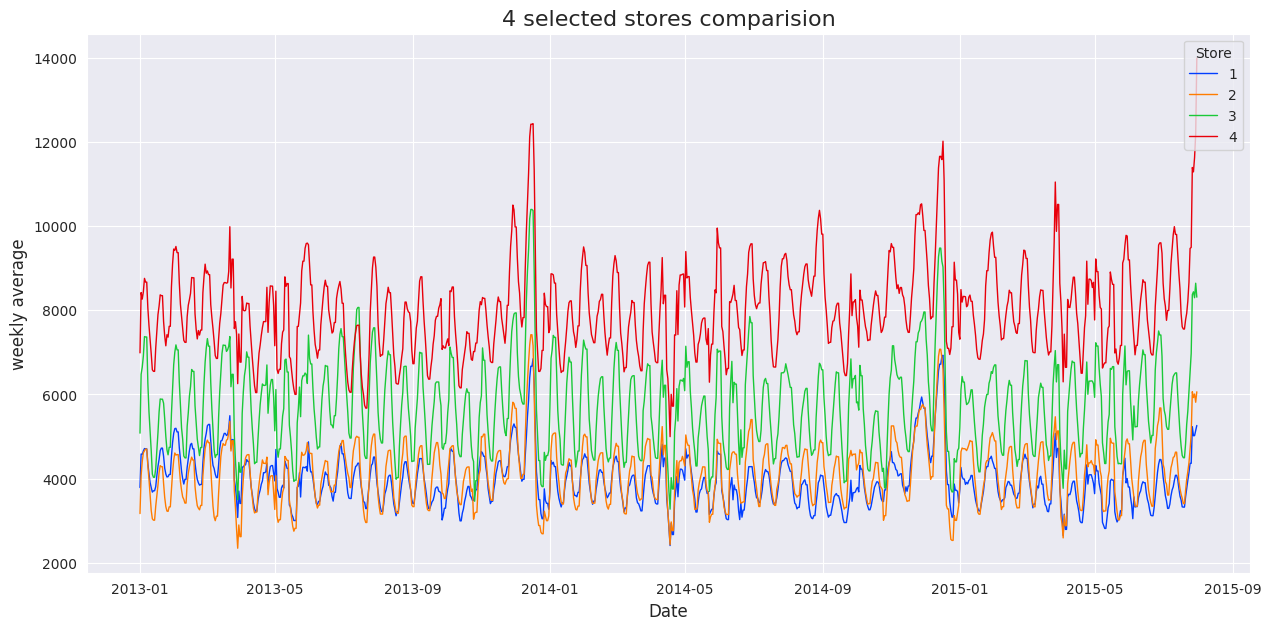

In [27]:
train['Sales_week'] = train['Sales'].rolling(window=7).mean()
train['Date'] = pd.to_datetime(train['Date'])
selected_stores = [1, 2, 3, 4]
train_subset = train[train['Store'].isin(selected_stores)].copy()
train_subset['Sales_MA7'] = train_subset.groupby('Store')['Sales'].transform(lambda x: x.rolling(window=7, min_periods=1).mean())
plt.figure(figsize=(15, 7))
sns.set_style("darkgrid")
plot = sns.lineplot(data=train_subset, x='Date', y='Sales_MA7', hue='Store', palette='bright', linewidth=1)
plt.title('4 selected stores comparision', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel(('weekly average'), fontsize=12)
plt.legend(title='Store', loc='upper right')
plt.show()

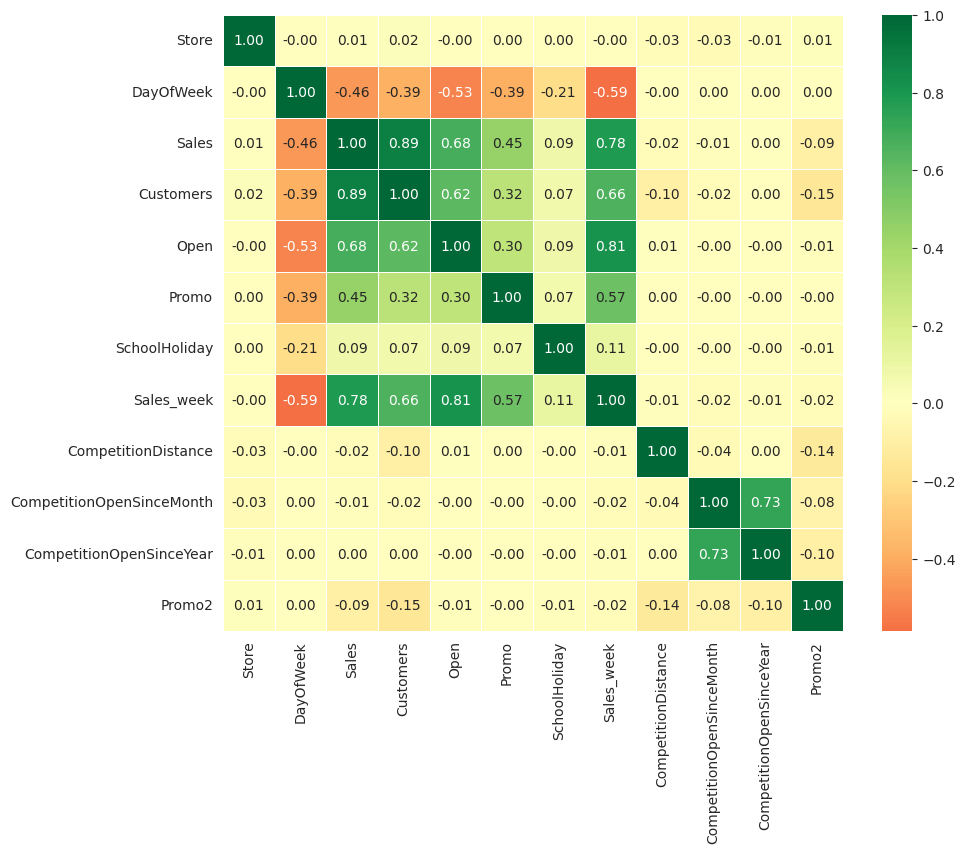

In [28]:
hambastegi= train_store.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(hambastegi, annot=True,fmt=".2f",cmap='RdYlGn',linewidths=0.5,center=0)
plt.show()

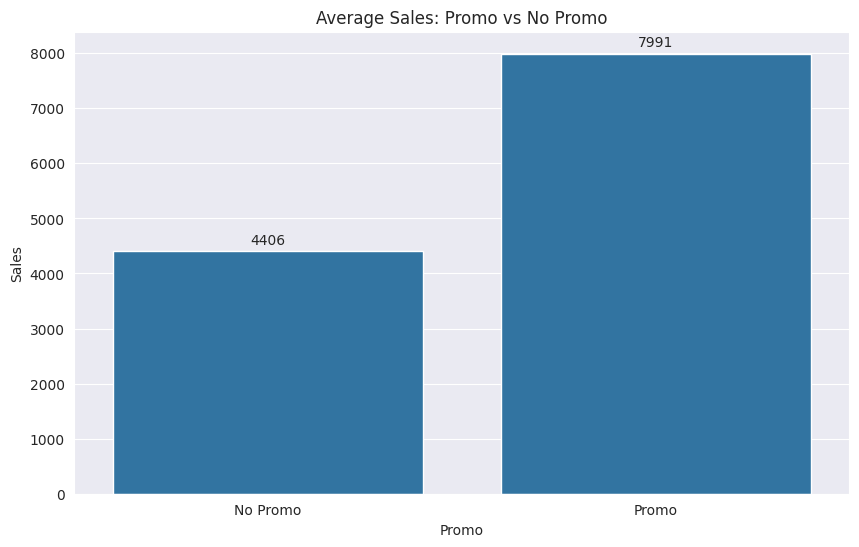

In [29]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Promo', y='Sales', data=train_store, errorbar=None)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.title('Average Sales: Promo vs No Promo')
plt.show()

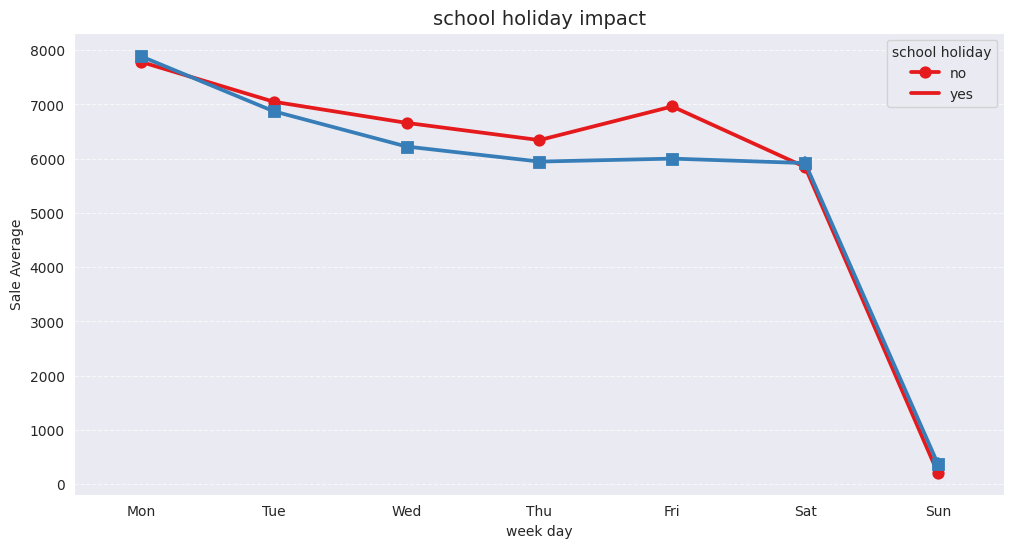

In [30]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='DayOfWeek', y='Sales', hue='SchoolHoliday', data=train_store, palette='Set1', markers=['o', 's'])
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title('school holiday impact', fontsize=14)
plt.xlabel('week day')
plt.ylabel('Sale Average')
plt.legend(title='school holiday', labels=['no', 'yes'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

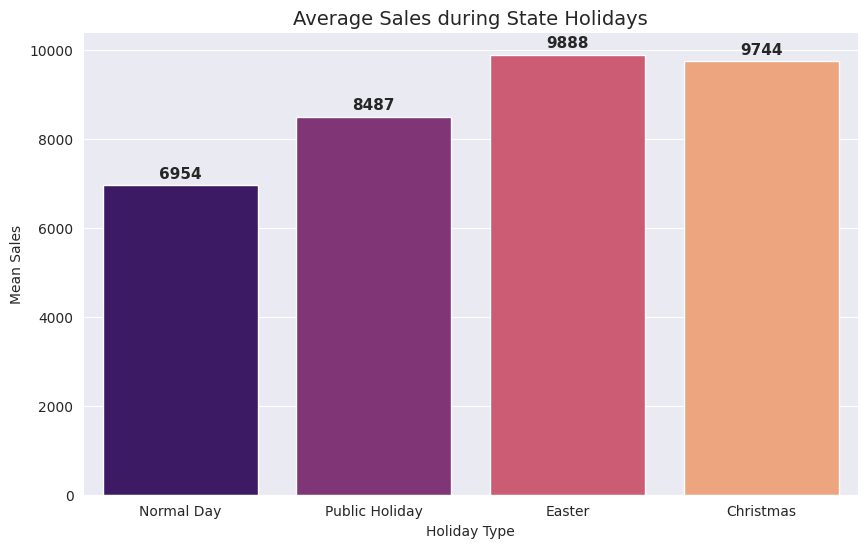

In [31]:
train_store['StateHoliday'] = train_store['StateHoliday'].astype(str)
open_stores = train_store[train_store['Open'] == 1]
holiday_impact = open_stores.groupby('StateHoliday')['Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='StateHoliday', 
    y='Sales', 
    data=holiday_impact, 
    hue='StateHoliday',
    palette='magma', 
    legend=False
)
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', padding=3, fontsize=11, fontweight='bold')
plt.xticks([0, 1, 2, 3], ['Normal Day', 'Public Holiday', 'Easter', 'Christmas'])
plt.title('Average Sales during State Holidays', fontsize=14)
plt.ylabel('Mean Sales')
plt.xlabel('Holiday Type')

sns.despine()
plt.show()

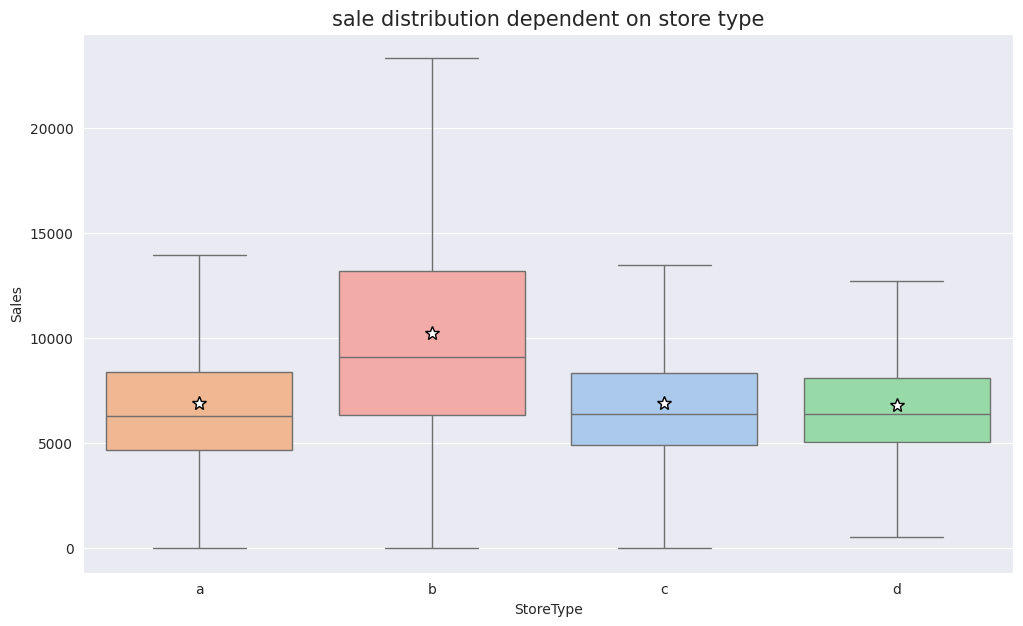

In [32]:
plt.figure(figsize=(12, 7))
ax = sns.boxplot(x='StoreType', y='Sales', data=open_stores, 
                 order=['a', 'b', 'c', 'd'], 
                 hue='StoreType',
                 palette='pastel',
                 legend=False,
                 showfliers=False,
                 showmeans=True,
                 meanprops={"marker":"*","markerfacecolor":"white", "markeredgecolor":"black", "markersize":"10"})

plt.title(('sale distribution dependent on store type'), fontsize=15)
plt.show()

In [33]:
#sakhte vijegi haye jadid
train_store['Date']=pd.to_datetime(train_store['Date'])
train_store['year']=train_store['Date'].dt.year
train_store['month']=train_store['Date'].dt.month
train_store['Day']=train_store['Date'].dt.day
train_store['season'] = train_store['month'] % 12 // 3 + 1
train_store['WeekOfYear'] = train_store['Date'].dt.isocalendar().week.astype(int)
train_store['IsAnyHoliday'] = ((train_store['StateHoliday'] != '0') | (train_store['SchoolHoliday'] == 1)).astype(int)
train_store = train_store.sort_values(['Store', 'Date'])
train_store['MovingAvg_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(1)
)
train_store['MovingAvg_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).mean().shift(1)
)
train_store['MovingAvg_7'] = train_store['MovingAvg_7'].bfill()
train_store['MovingAvg_30'] = train_store['MovingAvg_30'].bfill()

In [34]:
#lag features
train_store = train_store.sort_values(['Store', 'Date'])
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales'].shift(1)
train_store['Sales_yesterday'] = train_store.groupby('Store')['Sales_yesterday'].bfill()
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).mean().shift(7)
)
train_store['Sales_MA7_Lag7'] = train_store.groupby('Store')['Sales_MA7_Lag7'].transform(lambda x: x.bfill())
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=7).std().shift(1)
)
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales'].transform(
    lambda x: x.rolling(window=30).std().shift(1)
)
train_store['Sales_Std_7'] = train_store.groupby('Store')['Sales_Std_7'].transform(lambda x: x.bfill())
train_store['Sales_Std_30'] = train_store.groupby('Store')['Sales_Std_30'].transform(lambda x: x.bfill())

In [35]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   Sales_week                 1017203 non-null  float64       
 10  StoreType                  1017209 non-null  str           
 11  Assortment                 1017209 non-null  str  

In [36]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_week,...,Day,season,WeekOfYear,IsAnyHoliday,MovingAvg_7,MovingAvg_30,Sales_yesterday,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30
1016095,1,2,2013-01-01,0,0,0,0,a,1,7225.285714,...,1,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1014980,1,3,2013-01-02,5530,668,1,0,0,1,7236.571429,...,2,1,1,1,3788.0,4124.066667,0.0,3788.0,2752.283961,2006.107415
1013865,1,4,2013-01-03,4327,578,1,0,0,1,7303.285714,...,3,1,1,1,3788.0,4124.066667,5530.0,3788.0,2752.283961,2006.107415
1012750,1,5,2013-01-04,4486,619,1,0,0,1,7043.000000,...,4,1,1,1,3788.0,4124.066667,4327.0,3788.0,2752.283961,2006.107415
1011635,1,6,2013-01-05,4997,635,1,0,0,1,713.857143,...,5,1,1,1,3788.0,4124.066667,4486.0,3788.0,2752.283961,2006.107415


In [37]:
train_store.info()

<class 'pandas.DataFrame'>
Index: 1017209 entries, 1016095 to 1114
Data columns (total 28 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[us]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  str           
 8   SchoolHoliday              1017209 non-null  int64         
 9   Sales_week                 1017203 non-null  float64       
 10  StoreType                  1017209 non-null  str           
 11  Assortment                 1017209 non-null  str  

In [38]:
#fourier terms
day_of_year = train_store['Date'].dt.dayofyear
total_days = 365.25
for i in range(1, 4):
    train_store[f'fourier_sin_{i}'] = np.sin(2 * np.pi * i * day_of_year / total_days)
    train_store[f'fourier_cos_{i}'] = np.cos(2 * np.pi * i * day_of_year / total_days)

In [41]:
#holiday distance
holiday_dates = sorted(train_store[train_store['StateHoliday'] != '0']['Date'].unique())
def days_until_next_holiday(current_date):
    idx = np.searchsorted(holiday_dates, current_date)
    if idx < len(holiday_dates):
        return (holiday_dates[idx] - current_date).days
    else:
        return 0
train_store['DaysToHoliday'] = train_store['Date'].apply(days_until_next_holiday)

In [45]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_week,...,Sales_MA7_Lag7,Sales_Std_7,Sales_Std_30,fourier_sin_1,fourier_cos_1,fourier_sin_2,fourier_cos_2,fourier_sin_3,fourier_cos_3,DaysToHoliday
1016095,1,2,2013-01-01,0,0,0,0,a,1,7225.285714,...,3788.000000,2752.283961,2006.107415,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1016398,304,2,2013-01-01,0,0,0,0,a,1,0.000000,...,4697.857143,3551.001616,2616.163257,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1017080,986,2,2013-01-01,0,0,0,0,a,1,0.000000,...,7764.571429,5707.943467,4086.039932,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1016818,724,2,2013-01-01,0,0,0,0,a,1,0.000000,...,4609.714286,3445.625764,2463.147841,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0
1016899,805,2,2013-01-01,0,0,0,0,a,1,0.000000,...,4880.857143,3766.912548,2831.338484,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669,0


In [44]:
#time based split
train_store= train_store.sort_values('Date')
last_date=train_store['Date'].max()
split_date= last_date-pd.Timedelta(days=42)
train_data= train_store[train_store['Date']<=split_date]
valid_data= train_store[train_store['Date']>split_date]
print(len(train_data))
print(len(valid_data))

970379
46830
